# Titanic Dataset

We will examine the Titanic dataset provided by Udacity, and described on the Kaggle website. Our main question in looking at the data will be: what factors were most closely associated with surviving the shipwreck? To begin, we will import the dataset, and see what the data looks like.

In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# import the data from a local file 
data = pd.read_csv('titanic-data.csv')
# display sample of file contents
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
# summary view of file data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We see that there are 12 variables associated with each individual. **PassengerId** looks like an artifact of the dataset, indicating the row number; **Name**, **Ticket**, **Fare**, **Cabin**, and **Embarked** look like they might not have much value in analyzing survival rates. The main variables of interest will be **Age**, **Pclass** (Passenger Class), and **Sex**. These are easily interpreted, look fairly consistent, and are ready for processing. We can use them as independent variables, and Survived as the dependent variable. We can ask: were men or women more likely to survive? Were passengers in 1st, 2nd, or 3rd class more likely to survive? Did a passenger's age influence their chances of survival?

**SibSp** and **Parch** are interesting variables, but they pose some challenges. According to the Kaggle website, SibSp indicates the number of siblings or spouses the passenger was travelling with; Parch, the number of parents or children. The meaning of these variables may perhaps be inferred from other variables. For instance, if a passenger has a value of 2 for Parch, and an Age of 10, we might assume that this indicates a 10 year-old child travelling with parents. If the Age value is 25, however, it becomes less clear. The same holds for SibSp: does a value of 1 indicate someone travelling with a spouse? Or a sibling? Perhaps we can analyze these variables in combination with the Name column, and try to infer the relationship from there; matching on surname, guessing gender and status from their title ("Mr.","Mrs."...), etc. This seems beyond the scope of our initial analysis. However, we can assume that any value greater than 0 for either of these variables indicates that the passenger is not travelling alone. That sounds like another interesting variable to examine for correlation with survival, and one which is more easily approached.

Some reevaluations are in order. The variables we passed on initially -- Embarked, Fare, and Name, especially -- may prove to have value later. And, describing any of these variables as "independent" is a great leap. Is Sex really independent from Age and Pclass? In 1912, the year of the sinking, it seems unlikely that many women would be travelling alone. Chances are they would be travelling with a spouse or parents or siblings. This would have implications for the age range of females; and affording multiple tickets aboard the Titanic should also have implications for class and wealth. All these variables are probably bound up with one another in some way, which is going to confuse and skew simple analysis.

Additionally, we spoke too soon about the readiness of the data for processing. Looking at the counts for the variables, we see a total of 891 individuals, but we only have 714 Age values. We'll need to correct for this (and remember to account for this correction) before proceeding.

In [3]:
# https://pandas.pydata.org/pandas-docs/stable/missing_data.html
#
# fillna() function with 'pad' method replaces NaN values
# by propogating existing values forward 

data['Age'] = data['Age'].fillna(method='pad')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,35.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Looking at the sample data, we see that the `pad()` method has functioned as expected, propogating existing values forward into missing values. The Age value for the individual with Name "Moran, Mr. James", formerly NaN, is now 35, copied from the value of the individual above. We call the `describe()` method again to check the outcome. Age now has 891 values, same as the other variables. We see also that the mean and standard deviation have not been dramatically effected, so we can be reasonably confident that the value padding hasn't significantly altered the data.

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.00000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.58156,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.55459,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.42000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.00000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.00000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.00000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.00000,8.000000,6.000000,512.329200


With the data prepped, it's time to do our initial analysis. We begin with our main variables of interest: **Pclass**, **Age**, and **Sex**. Pclass and Sex are both catgorical variables, and can be analyzed with simple bar charts. Age is a continuous variable, so we'll graph a frequency distribution.

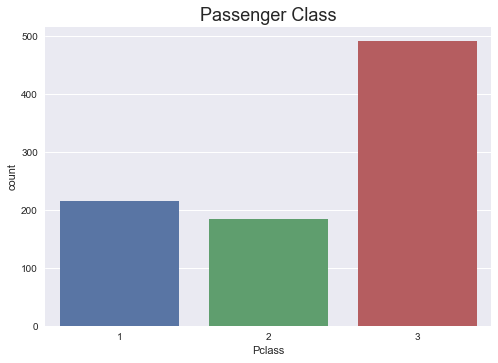

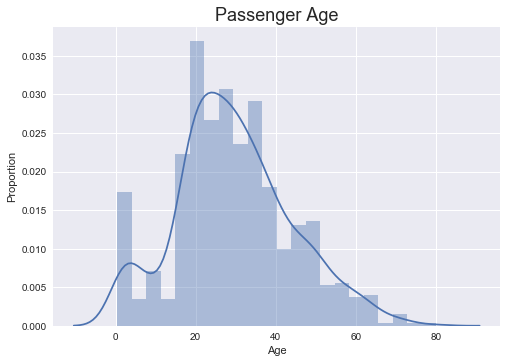

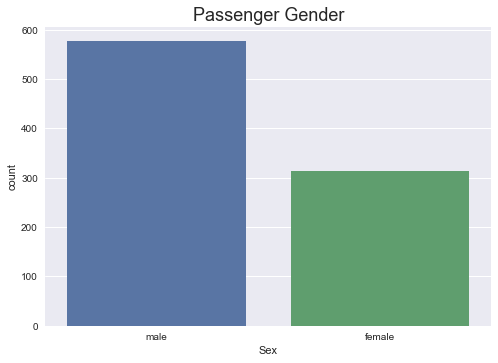

In [5]:
# http://seaborn.pydata.org/tutorial/categorical.html
# https://seaborn.pydata.org/tutorial/distributions.html
# https://stackoverflow.com/questions/42406233/how-to-add-title-to-seaborn-boxplot
# http://mlwhiz.com/blog/2015/09/13/seaborn_visualizations/

sns.countplot(x=data['Pclass']).set_title('Passenger Class', fontsize=18)
plt.show()
g = sns.distplot(data['Age'])
g.set_title('Passenger Age', fontsize=18)
g.set_ylabel('Proportion')
plt.show()
sns.countplot(x=data['Sex']).set_title('Passenger Gender', fontsize=18)
plt.show()

We can make some immediate observations. First and 2nd class had about the same amount of passengers, and 3rd class had more than 1st and 2nd class combined. About 2/3 of the pasenegers were male and 1/3 female. We see a definite pattern in the distribution in age ranges: concentrated around the middle, with a slight right skew. But, the range of ages makes the graph difficult to interpret in relationship to the other variables. Now seems a good time to manipulate the data, and add some derived columns that may make our opening analysis a little easier.

The **Age** variable is a good candidate for binning; grouping the data into ranges. Binning the data will make Age into a categorical variable, and help us make more general observations about survival outcomes. We start with age ranges by decade, but we can alter the size of these groups later if needs be. For instance, it may make more sense to broaden the ranges into 3 groups: `Youth (0-20)`, `Middle Age (20-50)`, `Older Age (50+)`.

We can also add columns related to the **SibSp** and **Parch** variables. While the meaning of the variables are open to interpretation, we can confidently make some inferences that might assist with the analysis. Anyone with a value greater than 1 for Parch or SibSp is travelling as a member of a family, whether that be as a parent or a child, or a sibling or a spouse. And, anyone with a value of 0 for both SibSp and Parch is travelling alone, or at least without any relatives. These are complements of one another, and can be represented by a single boolean variable, **Family**.

We perform the manipulations, take a quick look at the data to make sure everything is behaving correctly, and then produce more bar charts to examine the data distribution.

In [6]:
# https://chrisalbon.com/python/pandas_binning_data.html
#
# pd.cut() function bins values into groups
# To change the size of thie bins, change values in age_bins list

age_bins = [0,10,20,30,40,50,100]
data['BinnedAge'] = pd.cut(data['Age'], age_bins)

# create a column from a boolean mask:
# if 'Parch' variable is greater than 0,
# OR 'SibSp' variable is greater than 0,
# returns True or False 
data['Family'] = ( data['Parch'] > 0 ) | ( data['SibSp'] > 0 )

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,BinnedAge,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20, 30]",True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30, 40]",True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20, 30]",False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30, 40]",True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30, 40]",False
5,6,0,3,"Moran, Mr. James",male,35.0,0,0,330877,8.4583,NaN,Q,"(30, 40]",False
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(50, 100]",False
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,"(0, 10]",True
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,"(20, 30]",True
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,"(10, 20]",True


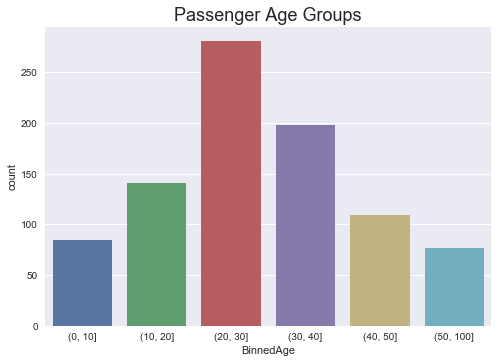

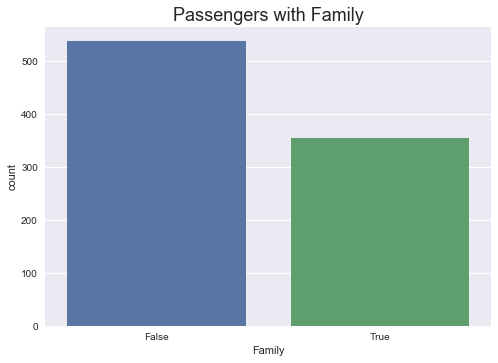

In [7]:
sns.countplot(x=data['BinnedAge']).set_title('Passenger Age Groups', fontsize=18)
plt.show()
sns.countplot(x=data['Family']).set_title('Passengers with Family', fontsize=18)
plt.show()

Binning the **Age** variable has produced the desired effect. Graphing the **BinnedAge** variable shows more clear results, with most passenegers between the ages of 20-30 and 30-40. It's worth noting here that this has slightly altered the shape of the original distribution of ages. The distribution for the **Family** variable shows that most passenegers were travelling without reliatives, but a good number were also travelling with family.

Now we are ready to analyze these variables with respect to our primary variable of interest, **Survived**. We recreate the previous graphs, but now divide the indidviduals into two groups, those who survived, and those who did not.

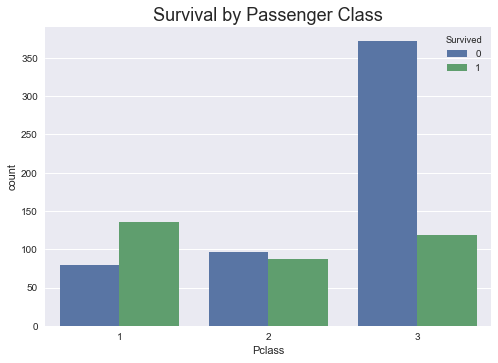

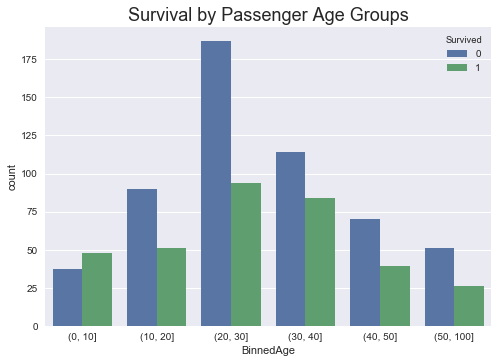

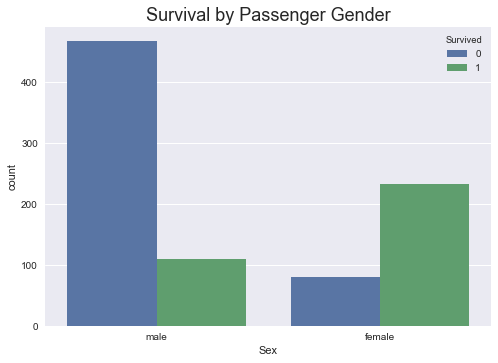

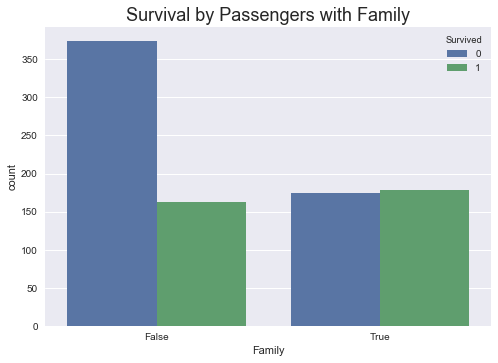

In [8]:
sns.countplot(x=data['Pclass'], hue=data['Survived']).set_title('Survival by Passenger Class', fontsize=18)
plt.show()
sns.countplot(x=data['BinnedAge'], hue=data['Survived']).set_title('Survival by Passenger Age Groups', fontsize=18)
plt.show()
sns.countplot(x=data['Sex'], hue=data['Survived']).set_title('Survival by Passenger Gender', fontsize=18)
plt.show()
sns.countplot(x=data['Family'], hue=data['Survived']).set_title('Survival by Passengers with Family', fontsize=18)
plt.show()

Some points immediately jump out at us. Survival rates were clearly worse for all the following groups:

* 3rd class passengers
* those between the ages of 20-30
* male passengers
* people travelling alone

Some other interesting notes:

* females, 1st class passenegers, those between the ages of 0-10, and those travelling with families all had positive survival rates
* all ages besides 0-10 had a negative survival rate
* the strongest positive survival rates were for females, and those travelling in 1st class

We are left with some lingereing questions however; namely, the one mentioned at the opening of this report: are these variables really independent? If not, then drawing any conclusions from these distributions may be in haste. Perhaps the starkest contrast we see is the survival rates between males and females: males strongly negative, females stringly positive. Instead of survival, let's analyze the variables **Pclass**, **BinnedAge**, and **Family** in terms of the variable **Sex**.

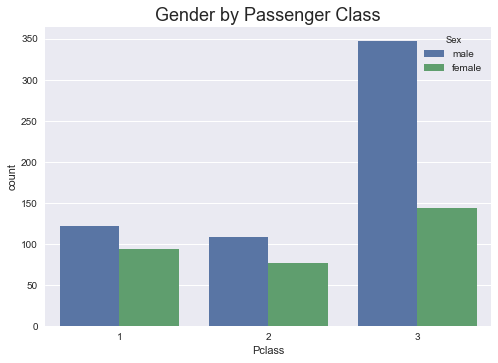

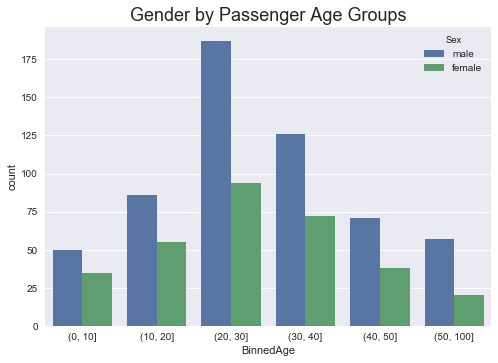

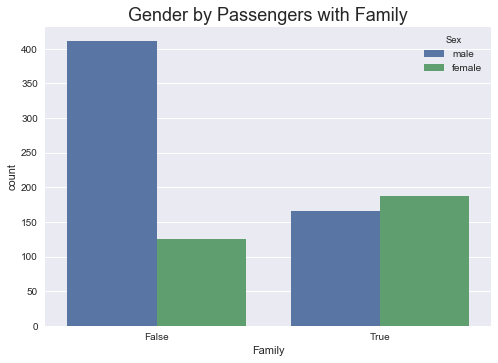

In [9]:
sns.countplot(x=data['Pclass'], hue=data['Sex']).set_title('Gender by Passenger Class', fontsize=18)
plt.show()
sns.countplot(x=data['BinnedAge'], hue=data['Sex']).set_title('Gender by Passenger Age Groups', fontsize=18)
plt.show()
sns.countplot(x=data['Family'], hue=data['Sex']).set_title('Gender by Passengers with Family', fontsize=18)
plt.show()

We see confirmed here an assumption we suggested previously: that most females abord the Titanic wouldn't be travelling alone. Interestingly, a large number were travelling alone. Nevertheless we see the majority of females were accompanied by some sort of relative; be it a sibling, spouse, parent, or child. And we see the reverse for males: most men were travelling alone.

Looking at the other graphs, though the distributions are simliar between males and females, we see some notable spikes in the male population. Males are overrepresented in 3rd class, and in the 20-30 year old range. We recall that all these groups -- males, those between the ages of 20-30, those travelling alone, and those in 3rd class -- experienced higher mortality rates. 

So, which factor, if any, is the determining factor? Were 3rd class passengers more likely to die than 1st class passengers? Or were males more likely to die, and it just so happens that males were concentrated in 3rd class? Did travelling with family help females' chances of survival? Or is just that females, more likely to survive, were often travelling with family? Answering these questions would be a good goal for the next round of analysis and exploration.

## Next Steps

Our initial analysis has returned some immediate knowledge, and hinted at the next set of questions that will need to be answered. Some factors were clearly associated with survival aboard the Titanic. Specifically, it appears that passenger class and passenger gender are good indicators for the passenger's survival. If a passenger was female or travelling in 1st class, they had better odds of surviving; male or in 3rd class, worse odds.

However, analyzing these factors independent of one another may not be telling the whole story. Looking at the simple distributions, we might assume that gender is the single most important factor in deciding survival. But gender isn't evenly distributed with regard to other variables, like age and class. One of the first steps we will want to take is analyzing survival rates while controlling for these variables. Some points of inquiry:

* what was the survival rate for males and females in 1st class? How does it compare to rates for males and females in 2nd class, and in 3rd class?
* were more families travelling in 1st class?
* were women in 3rd class more likely to be travelling alone? How did this effect their survival rate?
* does controlling for age ranges reveal any new information?
* what was going on with that positive survival rate for 0-10 year-olds?

All of this will require more data manipulation, and possibly standardizing some of the data. We should also revisit some of the variables we glossed over in the first round, and see if some new insights may be gleaned from them. Our opening analysis proved valuable, but much work remains to be done before we can make any conclusions about the data with confidence.